# Impact of rfft on DC level of output spectra
### 30/05/2018
### Laurent @IRAP

In [1]:
import numpy as np
from numpy.fft import rfft
import matplotlib.pyplot as plt

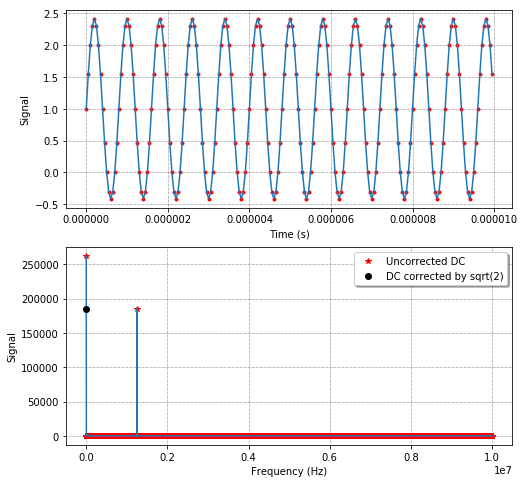

In [18]:
fs=20e6
fsig=fs/2**4
rms=1
duration=1
t=np.arange(int(fs*duration))/fs
# Defining a sine wave with a DC level equal to the rms of the sine wave
signal_t=rms+rms*np.sqrt(2)*np.sin(2*np.pi*fsig*t)

npts=2**18
f=np.arange(npts/2+1)*(fs/2)/(npts/2+1)
signal_f=abs(rfft(signal_t[0:npts]))

fig = plt.figure(figsize=(8, 8)) 
ax1 = plt.subplot(2,1,1)
imax=200
ax1.plot(t[0:imax], signal_t[0:imax], '.r')
ax1.plot(t[0:imax], signal_t[0:imax])
ax1.grid(color='k', linestyle=':', linewidth=0.5)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Signal")
ax2 = plt.subplot(2,1,2)
ax2.plot(f, signal_f,'*r', label='Uncorrected DC')
ax2.plot(f, signal_f)
ax2.plot([0], [signal_f[0]/np.sqrt(2)], 'ok', label='DC corrected by sqrt(2)')
ax2.grid(color='k', linestyle=':', linewidth=0.5)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Signal")
ax2.legend(loc=0, shadow=True)


# Conclusion :
The DC level after the rfft function needs to be divided by sqrt(2)